In [0]:

import pandas as pd
import pylab as pl
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


Developed by Shaquann S. 
This note book primarily looks at measurments of cross-correaltions. Being mind ful that this type of measurement is global, so there isn't high levels of details regarging similarite at a given time lag. Primarily focus on cumulative  vaules, if time permitted and we can understand it in great detail,we'll look into this measurement with daily increases.

In [0]:
from google.colab import drive

drive.mount("/content/gdrive")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls

gdrive/  sample_data/


In [0]:
%cd gdrive/

/content/gdrive


In [0]:
ls

'My Drive'/  'Shared drives'/


In [0]:
#cd gdrive/My\ Drive/ 
%cd Shared\ drives/

/content/gdrive/Shared drives


In [0]:
ls

Covid19_project/  MLTSA2020/  SARA-Observing/  SPIRou/


In [0]:
cd Covid19_project/

/content/gdrive/Shared drives/Covid19_project


In [0]:
cd data_sets/

/content/gdrive/Shared drives/Covid19_project/data_sets


In [0]:
ls

ALLvSK.png  DCvSK.png  global1/   NYvSK.png     usa_1/
CAvSK.png   FLvSK.png  NEvSK.png  skcv19_data/  weather_c19/


Loading in the data. 

In [0]:
c19_states_us = pd.read_csv('usa_1/us_state_c19_new.csv') 

In [0]:
c19_skorea = pd.read_csv('skcv19_data/sk_c19_new.csv') 

In [0]:
c19_skorea

,date,time,test,negative,confirmed,released,deceased,confirmed_per_cap,negative_per_cap,test_per_cap,deceased_per_cap
0,2020-01-20,16,1,0,1,0,0,1.950489e-08,0.000000e+00,1.950489e-08,0.000000
1,2020-01-21,16,1,0,1,0,0,1.950489e-08,0.000000e+00,1.950489e-08,0.000000
2,2020-01-22,16,4,3,1,0,0,1.950489e-08,5.851468e-08,7.801957e-08,0.000000
3,2020-01-23,16,22,21,1,0,0,1.950489e-08,4.096028e-07,4.291077e-07,0.000000
4,2020-01-24,16,27,25,2,0,0,3.900979e-08,4.876223e-07,5.266321e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
97,2020-04-26,0,598285,578558,10728,8717,242,2.092485e-04,1.128471e-02,1.166949e-02,0.000005
98,2020-04-27,0,601660,582027,10738,8764,243,2.094435e-04,1.135237e-02,1.173531e-02,0.000005
99,2020-04-28,0,608514,588559,10752,8854,244,2.097166e-04,1.147978e-02,1.186900e-02,0.000005
100,2020-04-29,0,614197,595129,10761,8922,246,2.098922e-04,1.160793e-02,1.197985e-02,0.000005


Putting the dfs in correct format.  

In [0]:
#c19_states_us['date'] = pd.to_datetime(c19_states_us['date'])

In [0]:
#c19_skorea['date'] = pd.to_datetime(c19_skorea['date'])

In [0]:
c19_states_us.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,population,pos_per_cap,neg_per_cap,tot_per_cap,death_per_cap
0,2020-01-22,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299b5b62b4d05b5d61eba3e3730bb17d025ceb75,2020-01-22T21:00:00Z,0.0,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0,7797095,1.282529e-07,0.0,1.282529e-07,0.0
1,2020-01-23,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,faa0d0b985f479eac50082e417dc84f9e645db8f,2020-01-23T21:00:00Z,0.0,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0,7797095,1.282529e-07,0.0,1.282529e-07,0.0
2,2020-01-24,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4763cdf13300976ba41317d7c7767e1c558a1134,2020-01-24T21:00:00Z,0.0,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0,7797095,1.282529e-07,0.0,1.282529e-07,0.0
3,2020-01-25,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,f17fc4cde1b2e7b57e946752d620e48d7f02c7ce,2020-01-25T21:00:00Z,0.0,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0,7797095,1.282529e-07,0.0,1.282529e-07,0.0
4,2020-01-26,WA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405aae8b4155c77878ab1e2a85f32d7bb7a45c9a,2020-01-26T21:00:00Z,0.0,0.0,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0,7797095,1.282529e-07,0.0,1.282529e-07,0.0


In [0]:
c19_skorea.head()

,date,time,test,negative,confirmed,released,deceased,confirmed_per_cap,negative_per_cap,test_per_cap,deceased_per_cap
0,2020-01-20,16,1,0,1,0,0,1.950489e-08,0.000000e+00,1.950489e-08,0.0
1,2020-01-21,16,1,0,1,0,0,1.950489e-08,0.000000e+00,1.950489e-08,0.0
2,2020-01-22,16,4,3,1,0,0,1.950489e-08,5.851468e-08,7.801957e-08,0.0
3,2020-01-23,16,22,21,1,0,0,1.950489e-08,4.096028e-07,4.291077e-07,0.0
4,2020-01-24,16,27,25,2,0,0,3.900979e-08,4.876223e-07,5.266321e-07,0.0


In [0]:
###list of state names. 
st_abvs_us_dat =np.unique(c19_states_us.state)  

In [0]:
print(st_abvs_us_dat.size)

51


Truncation by number of case, deaths etc. I.e. start the clock t=0 after we have approxixmalte x number of cases 

In [0]:
####the are the figures in which to truncate the time sereis
##### i.e. d_con = 10 means t=0 would occur at 10 case or so. 
d_con = 10 
c_con = 100
plt_con= 100



In [0]:
#####truncation of the time series by a certain death value 
### want select columns, I alternate between these
us_CA_death = c19_states_us.loc[(c19_states_us.state == 'CA') & (c19_states_us.death\
                    >= d_con)][['date', 'state', 'death', 'death_per_cap']]
us_NY_death = c19_states_us.loc[(c19_states_us.state == 'NY') & (c19_states_us.death\
                    >= d_con)][['date', 'state', 'death', 'death_per_cap']]
us_DC_death = c19_states_us.loc[(c19_states_us.state == 'DC') & (c19_states_us.death\
                    >= d_con)][['date', 'state', 'death', 'death_per_cap']]
us_NE_death = c19_states_us.loc[(c19_states_us.state == 'NE') & (c19_states_us.death\
                    >= d_con)][['date', 'state', 'death', 'death_per_cap']]
us_FL_death = c19_states_us.loc[(c19_states_us.state == 'FL') & (c19_states_us.death\
                    >= d_con)][['date', 'state', 'death', 'death_per_cap']]
sk_death = c19_skorea.loc[c19_skorea.deceased >= d_con]

us_CA_death['d10'] = np.arange(0,len(us_CA_death),1)
us_NY_death['d10'] = np.arange(0,len(us_NY_death),1)
us_DC_death['d10'] = np.arange(0,len(us_DC_death),1)
us_NE_death['d10'] = np.arange(0,len(us_NE_death),1)
us_FL_death['d10'] = np.arange(0,len(us_FL_death),1)
sk_death_d10 = np.arange(0,sk_death['deceased'].size,1) 



 




In [0]:
#####truncation of testing based on a number of positive cases, c_con (confimered condition) 

###can switch for select columns

us_CA_test = c19_states_us.loc[(c19_states_us['state'] == 'CA') & (c19_states_us['positive']\
                        >= c_con)][['date', 'state', 'total', 'tot_per_cap' ]]
us_NY_test = c19_states_us.loc[(c19_states_us['state'] == 'NY') & (c19_states_us['positive']\
                        >= c_con)][['date', 'state', 'total', 'tot_per_cap' ]]
us_DC_test = c19_states_us.loc[(c19_states_us['state'] == 'DC') & (c19_states_us['positive']\
                         >= c_con)][['date', 'state', 'total', 'tot_per_cap']]
us_NE_test = c19_states_us.loc[(c19_states_us['state'] == 'NE') & (c19_states_us['positive']\
                         >= c_con)][['date', 'state', 'total', 'tot_per_cap']]
us_FL_test = c19_states_us.loc[(c19_states_us['state'] == 'FL') & (c19_states_us['positive']\
                         >= c_con)][['date', 'state', 'total', 'tot_per_cap']]
sk_test = c19_skorea.loc[c19_skorea.confirmed >= c_con]

us_CA_test['c100'] = np.arange(0,len(us_CA_test),1)
us_NY_test['c100'] = np.arange(0,len(us_NY_test),1)
us_DC_test['c100'] = np.arange(0,len(us_DC_test),1)
us_NE_test['c100'] = np.arange(0,len(us_NE_test),1)
us_FL_test['c100'] = np.arange(0,len(us_FL_test),1)
sk_test_c100 = np.arange(0,sk_test['test'].size,1) 


Plotting of the truncated time series  for talk and paper. Avoid color blind unfreindly shcemes. Sunset gradient of colors scheme might be more fitting.

In [0]:
#####Plotting of original data for talk and paper
####this is why i made plt__con, so the time series will all same start conditions

######for plotting
us_CA_plt = c19_states_us.loc[(c19_states_us['state'] == 'CA') & (c19_states_us['positive']\
                                                          >= plt_con)]
us_NY_plt = c19_states_us.loc[(c19_states_us['state'] == 'NY') & (c19_states_us['positive']\
                                                                  >= plt_con)]
us_DC_plt = c19_states_us.loc[(c19_states_us['state'] == 'DC') & (c19_states_us['positive']\
                                                                  >= plt_con)]
us_NE_plt = c19_states_us.loc[(c19_states_us['state'] == 'NE') & (c19_states_us['positive']\
                                                                  >= plt_con)]
us_FL_plt = c19_states_us.loc[(c19_states_us['state'] == 'FL') & (c19_states_us['positive']\
                                                                  >= plt_con)]
sk_plt = c19_skorea.loc[c19_skorea.confirmed >= plt_con]

us_CA_plt_ind = np.arange(0,us_CA_plt['total'].size,1)
us_NY_plt_ind = np.arange(0,len(us_NY_plt),1)
us_DC_plt_ind = np.arange(0,len(us_DC_plt),1)
us_NE_plt_ind = np.arange(0,len(us_NE_plt),1)
us_FL_plt_ind = np.arange(0,len(us_FL_plt),1)
sk_plt_ind = np.arange(0,sk_plt['test'].size,1) 






(-0.5, 54.0)

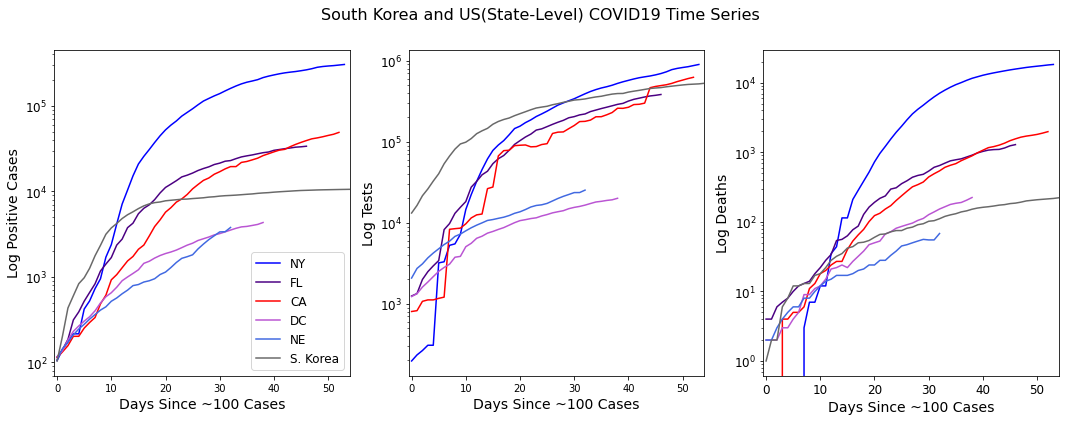

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)

###avoid color blind colors

fig.suptitle('South Korea and US(State-Level) COVID19 Time Series', fontsize=16)
ax1.semilogy(us_NY_plt_ind, (us_NY_plt['positive'] ), c='b', label='NY')
ax1.semilogy(us_FL_plt_ind, (us_FL_plt['positive']), c ='indigo', label='FL')
ax1.semilogy(us_CA_plt_ind, (us_CA_plt['positive'] ), c='r', label='CA') 
ax1.semilogy(us_DC_plt_ind, (us_DC_plt['positive']),   c='mediumorchid', label ='DC')
ax1.semilogy(us_NE_plt_ind, (us_NE_plt['positive'] ),  c='royalblue', label='NE')
ax1.semilogy(sk_plt_ind, (sk_plt['confirmed'] ), c='dimgrey', label='S. Korea')  
#ax1.text(50, 4000,r'S. Korea', horizontalalignment='center', color='gray', fontsize=12)
ax1.semilogy()
ax1.tick_params(axis='y', which='major', labelsize=12)
ax1.set_ylabel('Log Positive Cases', fontsize=14)
ax1.set_xlabel(r'Days Since ~100 Cases', fontsize=14) 
ax1.legend(fontsize=12) 


ax2.semilogy(us_NY_plt_ind, (us_NY_plt['total'] ), c='b')
ax2.semilogy(us_FL_plt_ind, (us_FL_plt['total']), c ='indigo')
ax2.semilogy(us_CA_plt_ind, (us_CA_plt['total'] ), c='r') 
ax2.semilogy(us_DC_plt_ind, (us_DC_plt['total']),   c='mediumorchid')
ax2.semilogy(us_NE_plt_ind, (us_NE_plt['total'] ),  c='royalblue')
ax2.semilogy(sk_plt_ind, (sk_plt['test'] ), c='dimgrey', ) 
ax2.set_ylabel('Log Tests', fontsize=14)
ax2.set_xlabel(r'Days Since ~100 Cases', fontsize=14) 
ax2.tick_params(axis='y', which='major', labelsize=12)

ax3.semilogy(us_NY_plt_ind, (us_NY_plt['death'] ), c='b')
ax3.semilogy(us_FL_plt_ind, (us_FL_plt['death']), c ='indigo')
ax3.semilogy(us_CA_plt_ind, (us_CA_plt['death'] ), c='r') 
ax3.semilogy(us_DC_plt_ind, (us_DC_plt['death']),   c='mediumorchid')
ax3.semilogy(us_NE_plt_ind, (us_NE_plt['death'] ),  c='royalblue')
ax3.semilogy(sk_plt_ind, (sk_plt['deceased'] ), c='dimgrey') 
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.set_ylabel('Log Deaths', fontsize=14)
ax3.set_xlabel(r'Days Since ~100 Cases', fontsize=14) 
ax3.set_xlim(-0.5, 54)  

#fig.subplots_adjust(vspace = 0.1 )

#pl.savefig('data_us_plot_paper.png')


Preparing the standardization and subsequent cross-correlation measuremement heas after . 

In [0]:
#####the time series(per capita ) are standardized before t-lagged  cross correlation

us_CA_death_std = (us_CA_death['death_per_cap'] - us_CA_death['death_per_cap'].mean()\
                   )/ us_CA_death['death_per_cap'].std()
us_NY_death_std = (us_NY_death['death_per_cap'] - us_NY_death['death_per_cap'].mean()\
                   )/ us_NY_death['death_per_cap'].std()
us_DC_death_std = (us_DC_death['death_per_cap'] - us_DC_death['death_per_cap'].mean()\
                   )/ us_DC_death['death_per_cap'].std()
us_NE_death_std = (us_NE_death['death_per_cap'] - us_NE_death['death_per_cap'].mean()\
                   )/ us_NE_death['death_per_cap'].std()
us_FL_death_std = (us_FL_death['death_per_cap'] - us_FL_death['death_per_cap'].mean()\
                   )/ us_FL_death['death_per_cap'].std()
sk_death_std = (sk_death['deceased_per_cap'] - sk_death['deceased_per_cap'].mean()\
                )/ sk_death['deceased_per_cap'].std()

In [0]:
###for tests 

us_CA_test_std = (us_CA_test['tot_per_cap'] - us_CA_test['tot_per_cap'].mean()\
                  )/ us_CA_test['tot_per_cap'].std()
us_NY_test_std = (us_NY_test['tot_per_cap'] - us_NY_test['tot_per_cap'].mean()\
                  )/ us_NY_test['tot_per_cap'].std()
us_DC_test_std = (us_DC_test['tot_per_cap'] - us_DC_test['tot_per_cap'].mean()\
                  )/ us_DC_test['tot_per_cap'].std()
us_NE_test_std = (us_NE_test['tot_per_cap'] - us_NE_test['tot_per_cap'].mean()\
                  )/ us_NE_test['tot_per_cap'].std()
us_FL_test_std = (us_FL_test['tot_per_cap'] - us_FL_test['tot_per_cap'].mean()\
                  )/ us_FL_test['tot_per_cap'].std()
sk_test_std = (sk_test['test_per_cap'] - sk_test['test_per_cap'].mean()\
               )/ sk_test['test_per_cap'].std() 


Calculating the cross correlations.

In [0]:

from scipy import signal 

corr_death_NY = signal.correlate(sk_death_std, us_NY_death_std, mode='full',\
                                 method='fft')/ us_NY_death_std.size
corr_death_CA = signal.correlate(sk_death_std, us_CA_death_std, mode='full',\
                                 method='fft')/ us_CA_death_std.size
corr_death_FL = signal.correlate(sk_death_std, us_FL_death_std, mode='full',\
                                 method='fft')/ us_FL_death_std.size
corr_death_NE = signal.correlate(sk_death_std, us_NE_death_std, mode='full',\
                                 method='fft')/ us_NE_death_std.size
corr_death_DC = signal.correlate(sk_death_std, us_DC_death_std, mode='full',\
                                 method='fft')/ us_DC_death_std.size


#corr2 = np.correlate(sk_death_std[0:us_NY_death_std.size], us_NY_death_std, "same")
#rolling_r = pd.Series(sk_death_std).rolling(10).cov(pd.Series(us_CA_death_std))

In [0]:

corr_test_NY = signal.correlate(sk_test_std, us_NY_test_std, mode='full',\
                                method='fft')/ us_NY_test_std.size
corr_test_CA = signal.correlate(sk_test_std, us_CA_test_std, mode='full',\
                                method='fft')/ us_CA_test_std.size
corr_test_FL = signal.correlate(sk_test_std, us_FL_test_std, mode='full'\
                                , method='fft')/ us_FL_test_std.size
corr_test_NE = signal.correlate(sk_test_std, us_NE_test_std, mode='full'\
                                , method='fft')/ us_NE_test_std.size
corr_test_DC = signal.correlate(sk_test_std, us_DC_test_std, mode='full'\
                                , method='fft')/ us_DC_test_std.size

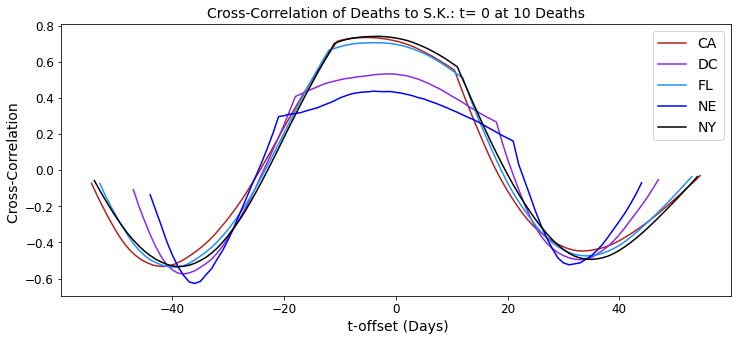

In [0]:
###Plotting the cross correaltions 

fig, ax1 = plt.subplots(figsize=(12,5))  
ax1.plot(np.arange(-(corr_death_CA.size -1)/2, (corr_death_CA.size -1)/2 + 1 ), corr_death_CA, c='firebrick', label='CA')
ax1.plot(np.arange(-(corr_death_DC.size -1)/2, (corr_death_DC.size -1)/2 + 1 ), corr_death_DC, c='blueviolet',   label='DC')
ax1.plot(np.arange(-(corr_death_FL.size -1)/2, (corr_death_FL.size -1)/2 + 1 ), corr_death_FL, c='dodgerblue', label='FL') 
ax1.plot(np.arange(-(corr_death_NE.size -1)/2, (corr_death_NE.size -1)/2 + 1 ), corr_death_NE, c='blue',  label='NE')
ax1.plot(np.arange(-(corr_death_NY.size -1)/2, (corr_death_NY.size -1)/2 + 1 ), corr_death_NY, c='k',  label='NY')

ax1.set_title('Cross-Correlation of Deaths to S.K.: t= 0 at ' + str(d_con) + ' Deaths', fontsize=14)

ax1.set_xlabel(' t-offset (Days)', fontsize=14 )
ax1.legend(fontsize=14) 
ax1.set_ylabel('Cross-Correlation ', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
#pl.savefig('death_corr_t0_at_' + str(d_con) +'.png')


Text(0, 0.5, 'Cross-Correlation ')

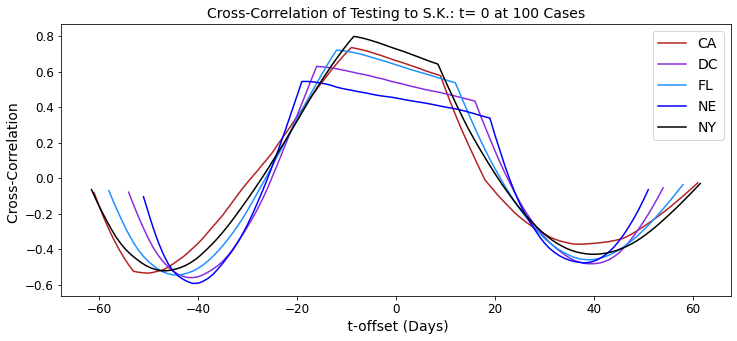

In [0]:
#fig, ax1 = plt.subplots(figsize=(9,3)) 
#ax1.plot(np.arange(0, corr_test_CA.size), corr_test_CA, c='firebrick', label='CA')
#ax1.plot(np.arange(0, corr_test_DC.size), corr_test_DC, c='blueviolet',   label='DC')
#ax1.plot(np.arange(0, corr_test_FL.size), corr_test_FL, c='dodgerblue', label='FL') 
#ax1.plot(np.arange(0, corr_test_NE.size), corr_test_NE, c='blue',  label='NE')
#ax1.plot(np.arange(0, corr_test_NY.size), corr_test_NY, c='k',  label='NY')


fig, ax1 = plt.subplots(figsize=(12,5))  
ax1.plot(np.arange(-(corr_test_CA.size -1)/2, (corr_test_CA.size -1)/2 + 1 ), corr_test_CA, c='firebrick', label='CA')
ax1.plot(np.arange(-(corr_test_DC.size -1)/2, (corr_test_DC.size -1)/2 + 1 ), corr_test_DC, c='blueviolet',   label='DC')
ax1.plot(np.arange(-(corr_test_FL.size -1)/2, (corr_test_FL.size -1)/2 + 1 ), corr_test_FL, c='dodgerblue', label='FL') 
ax1.plot(np.arange(-(corr_test_NE.size -1)/2, (corr_test_NE.size -1)/2 + 1 ), corr_test_NE, c='blue',  label='NE')
ax1.plot(np.arange(-(corr_test_NY.size -1)/2, (corr_test_NY.size -1)/2 + 1 ), corr_test_NY, c='k',  label='NY')



ax1.set_xlabel(' t-offset (Days)', fontsize=14 )
ax1.set_title('Cross-Correlation of Testing to S.K.: t= 0 at ' + str(c_con) + ' Cases', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
#ax1.set_xlabel(' us_NY_test_std (Days)', fontsize=14 )
ax1.legend(fontsize=14) 
#### is the x lable t-offset()

#ax1.set_xlabel('lag (Days)', fontsize=14 )
ax1.set_ylabel('Cross-Correlation ', fontsize=14)
#ax1.tick_params(axis='both', which='major', labelsize=12)

#pl.savefig('test_corr_t0_at_' + str(c_con) +'.png')

In [0]:
######an investigation into correaltion the new daily deaths 

##### however considering the time remianing in the project 
#####there isn't time to interpret this to great detail with respect to the project. 



us_CA_new_death = np.zeros(us_CA_death['death'].size)
us_CA_new_death[1:] = np.diff(us_CA_death['death'])  

us_NY_new_death = np.zeros(us_NY_death['death'].size)
us_NY_new_death[1:] = np.diff(us_NY_death['death']) 

us_DC_new_death = np.zeros(us_DC_death['death'].size)
us_DC_new_death[1:] = np.diff(us_DC_death['death'])

us_NE_new_death = np.zeros(us_NE_death['death'].size)
us_NE_new_death[1:] = np.diff(us_NE_death['death'])  

us_FL_new_death = np.zeros(us_FL_death['death'].size)
us_FL_new_death[1:] = np.diff(us_FL_death['death'])  

sk_new_death = np.zeros(sk_death['deceased'].size)
sk_new_death[1:] = np.diff(sk_death['deceased'])  


us_CA_new_death_std = (us_CA_new_death - us_CA_new_death.mean())/(us_CA_new_death.std())
us_NY_new_death_std = (us_NY_new_death - us_NY_new_death.mean())/(us_NY_new_death.std())
us_NE_new_death_std = (us_NE_new_death - us_NE_new_death.mean())/(us_NE_new_death.std())
us_DC_new_death_std = (us_DC_new_death - us_DC_new_death.mean())/(us_DC_new_death.std())
us_FL_new_death_std = (us_FL_new_death - us_FL_new_death.mean())/(us_FL_new_death.std())
sk_new_death_std = (sk_new_death - sk_new_death.mean())/(sk_new_death.std())



In [0]:
corr_NY_new = signal.correlate(sk_new_death_std, us_NY_new_death_std, mode='full',method='fft')/ us_NY_new_death_std.size
corr_CA_new = signal.correlate(sk_new_death_std, us_CA_new_death_std, mode='full', method='fft')/ us_CA_new_death_std.size
corr_FL_new = signal.correlate(sk_new_death_std, us_FL_new_death_std, mode='full', method='fft')/ us_FL_new_death_std.size
corr_NE_new = signal.correlate(sk_new_death_std, us_NE_new_death_std, mode='full', method='fft')/ us_NE_new_death_std.size
corr_DC_new = signal.correlate(sk_new_death_std, us_DC_new_death_std, mode='full', method='fft')/ us_DC_new_death_std.size

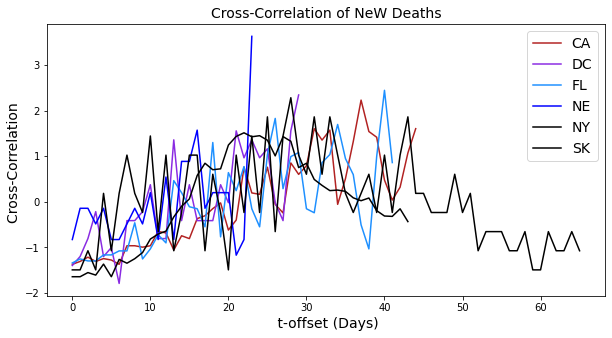

In [0]:

#####plotting currently very noisy. 

fig, ax1 = plt.subplots(figsize=(10,5) ) 
#ax1.plot(np.arange(-(corr_CA_new.size -1)/2, (corr_CA_new.size -1)/2 + 1 ), corr_CA_new, c='firebrick', label='CA')
#ax1.plot(np.arange(-(corr_DC_new.size -1)/2, (corr_DC_new.size -1)/2 + 1 ), corr_DC_new, c='blueviolet',   label='DC')
#ax1.plot(np.arange(-(corr_FL_new.size -1)/2, (corr_FL_new.size -1)/2 + 1 ), corr_FL_new, c='dodgerblue', label='FL') 
#ax1.plot(np.arange(-(corr_NE_new.size -1)/2, (corr_NE_new.size -1)/2 + 1 ), corr_NE_new, c='blue',  label='NE')
#ax1.plot(np.arange(-(corr_NY_new.size -1)/2, (corr_NY_new.size -1)/2 + 1 ), corr_NY_new, c='k',  label='NY')

ax1.plot(np.arange(us_CA_new_death.size), us_CA_new_death_std, c='firebrick', label='CA')
ax1.plot(np.arange(us_DC_new_death.size), us_DC_new_death_std, c='blueviolet',   label='DC')
ax1.plot(np.arange(us_FL_new_death.size), us_FL_new_death_std, c='dodgerblue', label='FL') 
ax1.plot(np.arange(us_NE_new_death.size), us_NE_new_death_std, c='blue',  label='NE')
ax1.plot(np.arange(us_NY_new_death.size), us_NY_new_death_std, c='k',  label='NY')
ax1.plot(np.arange(sk_new_death.size), sk_new_death_std, c='k',  label='SK')

ax1.set_title('Cross-Correlation of NeW Deaths', fontsize=14)

ax1.set_xlabel(' t-offset (Days)', fontsize=14 )
ax1.legend(fontsize=14) 
ax1.set_ylabel('Cross-Correlation ', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=10)

In [0]:
####found a script for moving average smoothening on stack overflow 
###smothing it with moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [0]:
###testing it out 
corr_fl_nw_roll = moving_average(corr_FL_new, 4)

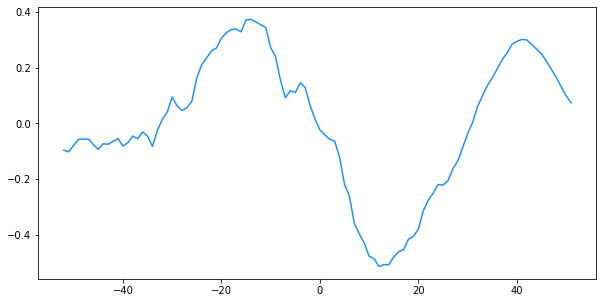

In [0]:
fig, ax1 = plt.subplots(figsize=(10,5) ) 

ax1.plot(np.arange(-(corr_FL_new.size -1)/2 +1 , (corr_FL_new.size -1)/2 - 1 ), corr_fl_nw_roll, c='dodgerblue', label='FL')

Printing values for the table.

In [0]:
####grabbing all the maxim correlations no neater way to do this. maybe keep pd  
####series format next time. 


###printing for tables in the paper.
####THIS IS FOR deaths 

print('CA')
print(np.max(corr_death_CA), np.arange(-(corr_death_CA.size -1)/2,\
                (corr_death_CA.size -1)/2 + 1 )[np.where(corr_death_CA\
 
                                          == np.max(corr_death_CA) )[0][0]])
print(us_CA_death_std.size)

print('NY')
print(np.max(corr_death_NY), np.arange(-(corr_death_NY.size -1)/2,\
                (corr_death_NY.size -1)/2 + 1 )[np.where(corr_death_NY\
                                          == np.max(corr_death_NY) )[0][0]])

print('FL')
print(np.max(corr_death_FL), np.arange(-(corr_death_FL.size -1)/2,\
                (corr_death_FL.size -1)/2 + 1 )[np.where(corr_death_FL\
                                          == np.max(corr_death_FL) )[0][0]])


print('DC')
print(np.max(corr_death_DC), np.arange(-(corr_death_DC.size -1)/2,\
                (corr_death_DC.size -1)/2 + 1 )[np.where(corr_death_DC\
                                          == np.max(corr_death_DC) )[0][0]])

print('NE')
print(np.max(corr_death_NE), np.arange(-(corr_death_NE.size -1)/2,\
                (corr_death_NE.size -1)/2 + 1 )[np.where(corr_death_NE\
                                          == np.max(corr_death_NE) )[0][0]])


"\nprint('CA')\nprint(np.max(corr_death_CA), np.arange(-(corr_death_CA.size -1)/2,                (corr_death_CA.size -1)/2 + 1 )[np.where(corr_death_CA \n                                          == np.max(corr_death_CA) )[0][0]])\nprint(us_CA_death_std.size)\n\nprint('NY')\nprint(np.max(corr_death_NY), np.arange(-(corr_death_NY.size -1)/2,                (corr_death_NY.size -1)/2 + 1 )[np.where(corr_death_NY                                          == np.max(corr_death_NY) )[0][0]])\n\nprint('FL')\nprint(np.max(corr_death_FL), np.arange(-(corr_death_FL.size -1)/2,                (corr_death_FL.size -1)/2 + 1 )[np.where(corr_death_FL                                          == np.max(corr_death_FL) )[0][0]])\n\n\nprint('DC')\nprint(np.max(corr_death_DC), np.arange(-(corr_death_DC.size -1)/2,                (corr_death_DC.size -1)/2 + 1 )[np.where(corr_death_DC                                          == np.max(corr_death_DC) )[0][0]])\n\nprint('NE')\nprint(np.max(corr_death_NE), np.ar

In [0]:
#####for tests 

print('CA')
print(np.max(corr_test_CA), np.arange(-(corr_test_CA.size -1)/2,\
                (corr_test_CA.size -1)/2 + 1 )[np.where(corr_test_CA\
                                          == np.max(corr_test_CA) )[0][0]])

print('NY')
print(np.max(corr_test_NY), np.arange(-(corr_test_NY.size -1)/2,\
                (corr_test_NY.size -1)/2 + 1 )[np.where(corr_test_NY\
                                          == np.max(corr_test_NY) )[0][0]])

print('FL')
print(np.max(corr_test_FL), np.arange(-(corr_test_FL.size -1)/2,\
                (corr_test_FL.size -1)/2 + 1 )[np.where(corr_test_FL\
                                          == np.max(corr_test_FL) )[0][0]])


print('DC')
print(np.max(corr_test_DC), np.arange(-(corr_test_DC.size -1)/2,\
                (corr_test_DC.size -1)/2 + 1 )[np.where(corr_test_DC\
                                          == np.max(corr_test_DC) )[0][0]])

print('NE')
print(np.max(corr_test_NE), np.arange(-(corr_test_NE.size -1)/2,\
                (corr_test_NE.size -1)/2 + 1 )[np.where(corr_test_NE\
                                          == np.max(corr_test_NE) )[0][0]])

                                        

"\nprint('CA')\nprint(np.max(corr_test_CA), np.arange(-(corr_test_CA.size -1)/2,                (corr_test_CA.size -1)/2 + 1 )[np.where(corr_test_CA                                          == np.max(corr_test_CA) )[0][0]])\n\nprint('NY')\nprint(np.max(corr_test_NY), np.arange(-(corr_test_NY.size -1)/2,                (corr_test_NY.size -1)/2 + 1 )[np.where(corr_test_NY                                          == np.max(corr_test_NY) )[0][0]])\n\nprint('FL')\nprint(np.max(corr_test_FL), np.arange(-(corr_test_FL.size -1)/2,                (corr_test_FL.size -1)/2 + 1 )[np.where(corr_test_FL                                          == np.max(corr_test_FL) )[0][0]])\n\n\nprint('DC')\nprint(np.max(corr_test_DC), np.arange(-(corr_test_DC.size -1)/2,                (corr_test_DC.size -1)/2 + 1 )[np.where(corr_test_DC                                          == np.max(corr_test_DC) )[0][0]])\n\nprint('NE')\nprint(np.max(corr_test_NE), np.arange(-(corr_test_NE.size -1)/2,                (corr_

Looking at cross correaltion to see how it mathced up with adams death lag plots, and analyze it if we have time. 

In [0]:
d_con2 = 5 

c_con2 = 100 

In [0]:
us_CA_death = c19_states_us.loc[(c19_states_us.state == 'CA') & (c19_states_us.death\
                    >= d_con2)][['date', 'state', 'death','positive', 'pos_per_cap',\
                                'death_per_cap']]
us_NY_death = c19_states_us.loc[(c19_states_us.state == 'NY') & (c19_states_us.death\
                    >= d_con2)][['date', 'state', 'death','positive', 'pos_per_cap',\
                                'death_per_cap']]
us_DC_death = c19_states_us.loc[(c19_states_us.state == 'DC') & (c19_states_us.death\
                    >= d_con2)][['date', 'state', 'death','positive', 'pos_per_cap',\
                                'death_per_cap']]
us_NE_death = c19_states_us.loc[(c19_states_us.state == 'NE') & (c19_states_us.death\
                    >= d_con2)][['date', 'state', 'death','positive', 'pos_per_cap',\
                                'death_per_cap']]
us_FL_death = c19_states_us.loc[(c19_states_us.state == 'FL') & (c19_states_us.death\
                    >= d_con2)][['date', 'state', 'death','positive', 'pos_per_cap',\
                                'death_per_cap']]
sk_death = c19_skorea.loc[c19_skorea.deceased >= d_con2]

us_CA_death['d10'] = np.arange(0,len(us_CA_death),1)
us_NY_death['d10'] = np.arange(0,len(us_NY_death),1)
us_DC_death['d10'] = np.arange(0,len(us_DC_death),1)
us_NE_death['d10'] = np.arange(0,len(us_NE_death),1)
us_FL_death['d10'] = np.arange(0,len(us_FL_death),1)
sk_death_d10 = np.arange(0,sk_death['deceased'].size,1)

In [0]:
us_CA_death_std = (us_CA_death['death_per_cap'] - us_CA_death['death_per_cap'].mean()\
                   )/ us_CA_death['death_per_cap'].std()
us_NY_death_std = (us_NY_death['death_per_cap'] - us_NY_death['death_per_cap'].mean()\
                   )/ us_NY_death['death_per_cap'].std()
us_DC_death_std = (us_DC_death['death_per_cap'] - us_DC_death['death_per_cap'].mean()\
                   )/ us_DC_death['death_per_cap'].std()
us_NE_death_std = (us_NE_death['death_per_cap'] - us_NE_death['death_per_cap'].mean()\
                   )/ us_NE_death['death_per_cap'].std()
us_FL_death_std = (us_FL_death['death_per_cap'] - us_FL_death['death_per_cap'].mean()\
                   )/ us_FL_death['death_per_cap'].std()
sk_death_std = (sk_death['deceased_per_cap'] - sk_death['deceased_per_cap'].mean()\
                )/ sk_death['deceased_per_cap'].std()

In [0]:
us_CA_pos_std = (us_CA_death['pos_per_cap'] - us_CA_death['pos_per_cap'].mean()\
                   )/ us_CA_death['pos_per_cap'].std()
us_NY_pos_std = (us_NY_death['pos_per_cap'] - us_NY_death['pos_per_cap'].mean()\
                   )/ us_NY_death['pos_per_cap'].std()
us_DC_pos_std = (us_DC_death['pos_per_cap'] - us_DC_death['pos_per_cap'].mean()\
                   )/ us_DC_death['pos_per_cap'].std()
us_NE_pos_std = (us_NE_death['pos_per_cap'] - us_NE_death['pos_per_cap'].mean()\
                   )/ us_NE_death['pos_per_cap'].std()
us_FL_pos_std = (us_FL_death['pos_per_cap'] - us_FL_death['pos_per_cap'].mean()\
                   )/ us_FL_death['pos_per_cap'].std()
sk_pos_std = (sk_death['confirmed_per_cap'] - sk_death['confirmed_per_cap'].mean()\
                )/ sk_death['confirmed_per_cap'].std()

In [0]:
corr_pos_dead_NY = signal.correlate(us_NY_pos_std, us_NY_death_std, mode='full',\
                                 method='fft')/ us_NY_death_std.size
corr_pos_dead_CA = signal.correlate(us_CA_pos_std, us_CA_death_std, mode='full',\
                                 method='fft')/ us_CA_death_std.size
corr_pos_dead_FL = signal.correlate(us_FL_pos_std, us_FL_death_std, mode='full',\
                                 method='fft')/ us_FL_death_std.size
corr_pos_dead_NE = signal.correlate(us_NE_pos_std, us_NE_death_std, mode='full',\
                                 method='fft')/ us_NE_death_std.size
corr_pos_dead_DC = signal.correlate(us_DC_pos_std, us_DC_death_std, mode='full',\
                                 method='fft')/ us_DC_death_std.size
corr_pos_dead_SK = signal.correlate(sk_pos_std, sk_death_std, mode='full',\
                                 method='fft')/ sk_death_std.size


In [0]:
w1 = 4
us_CA_new_death = np.zeros(us_CA_death['death_per_cap'].size)
us_CA_new_death[1:] = np.diff(us_CA_death['death_per_cap'])  
us_CA_new_death = moving_average(us_CA_new_death, w1)

us_NY_new_death = np.zeros(us_NY_death['death_per_cap'].size)
us_NY_new_death[1:] = np.diff(us_NY_death['death_per_cap']) 
us_NY_new_death = moving_average(us_NY_new_death, w1)

us_DC_new_death = np.zeros(us_DC_death['death_per_cap'].size)
us_DC_new_death[1:] = np.diff(us_DC_death['death_per_cap'])
us_DC_new_death = moving_average(us_DC_new_death, w1)


us_NE_new_death = np.zeros(us_NE_death['death_per_cap'].size)
us_NE_new_death[1:] = np.diff(us_NE_death['death_per_cap'])  
us_NE_new_death = moving_average(us_NE_new_death, w1)


us_FL_new_death = np.zeros(us_FL_death['death_per_cap'].size)
us_FL_new_death[1:] = np.diff(us_FL_death['death_per_cap']) 
us_FL_new_death = moving_average(us_FL_new_death, w1) 

sk_new_death = np.zeros(sk_death['deceased_per_cap'].size)
sk_new_death[1:] = np.diff(sk_death['deceased_per_cap']) 
sk_new_death = moving_average(sk_new_death, w1) 


us_CA_new_death_std = (us_CA_new_death - us_CA_new_death.mean())/(us_CA_new_death.std())
us_NY_new_death_std = (us_NY_new_death - us_NY_new_death.mean())/(us_NY_new_death.std())
us_NE_new_death_std = (us_NE_new_death - us_NE_new_death.mean())/(us_NE_new_death.std())
us_DC_new_death_std = (us_DC_new_death - us_DC_new_death.mean())/(us_DC_new_death.std())
us_FL_new_death_std = (us_FL_new_death - us_FL_new_death.mean())/(us_FL_new_death.std())
sk_new_death_std = (sk_new_death - sk_new_death.mean())/(sk_new_death.std()) 


In [0]:
us_CA_new_pos = np.zeros(us_CA_death['pos_per_cap'].size)
us_CA_new_pos[1:] = np.diff(us_CA_death['pos_per_cap'])  
us_CA_new_pos = moving_average(us_CA_new_pos, w1)

us_NY_new_pos = np.zeros(us_NY_death['pos_per_cap'].size)
us_NY_new_pos[1:] = np.diff(us_NY_death['pos_per_cap']) 
us_NY_new_pos = moving_average(us_NY_new_pos, w1)

us_DC_new_pos = np.zeros(us_DC_death['pos_per_cap'].size)
us_DC_new_pos[1:] = np.diff(us_DC_death['pos_per_cap'])
us_DC_new_pos = moving_average(us_DC_new_pos, w1)

us_NE_new_pos = np.zeros(us_NE_death['pos_per_cap'].size)
us_NE_new_pos[1:] = np.diff(us_NE_death['pos_per_cap']) 
us_NE_new_pos = moving_average(us_NE_new_pos, w1) 

us_FL_new_pos = np.zeros(us_FL_death['pos_per_cap'].size)
us_FL_new_pos[1:] = np.diff(us_FL_death['pos_per_cap'])  
us_FL_new_pos = moving_average(us_FL_new_pos, w1)

sk_new_pos = np.zeros(sk_death['confirmed_per_cap'].size)
sk_new_pos[1:] = np.diff(sk_death['confirmed_per_cap']) 
sk_new_pos = moving_average(sk_new_pos, w1)



us_CA_new_pos_std = (us_CA_new_pos - us_CA_new_pos.mean())/(us_CA_new_pos.std())
us_NY_new_pos_std = (us_NY_new_pos - us_NY_new_pos.mean())/(us_NY_new_pos.std())
us_NE_new_pos_std = (us_NE_new_pos - us_NE_new_pos.mean())/(us_NE_new_pos.std())
us_DC_new_pos_std = (us_DC_new_pos - us_DC_new_pos.mean())/(us_DC_new_pos.std())
us_FL_new_pos_std = (us_FL_new_pos - us_FL_new_pos.mean())/(us_FL_new_pos.std())
sk_new_pos_std = (sk_new_pos - sk_new_pos.mean())/(sk_new_pos.std()) 

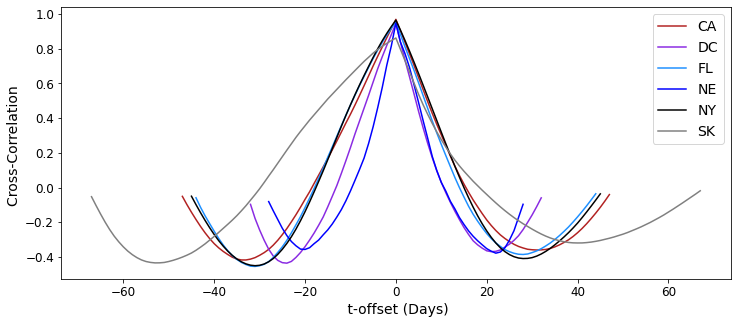

In [0]:
fig, ax1 = plt.subplots(figsize=(12,5))  
ax1.plot(np.arange(-(corr_pos_dead_CA.size -1)/2, (corr_pos_dead_CA.size -1)/2 + 1 ), corr_pos_dead_CA, c='firebrick', label='CA')
ax1.plot(np.arange(-(corr_pos_dead_DC.size -1)/2, (corr_pos_dead_DC.size -1)/2 + 1 ), corr_pos_dead_DC, c='blueviolet',   label='DC')
ax1.plot(np.arange(-(corr_pos_dead_FL.size -1)/2, (corr_pos_dead_FL.size -1)/2 + 1 ), corr_pos_dead_FL, c='dodgerblue', label='FL') 
ax1.plot(np.arange(-(corr_pos_dead_NE.size -1)/2, (corr_pos_dead_NE.size -1)/2 + 1 ), corr_pos_dead_NE, c='blue',  label='NE')
ax1.plot(np.arange(-(corr_pos_dead_NY.size -1)/2, (corr_pos_dead_NY.size -1)/2 + 1 ), corr_pos_dead_NY, c='k',  label='NY')
ax1.plot(np.arange(-(corr_pos_dead_SK.size -1)/2, (corr_pos_dead_SK.size -1)/2 + 1 ), corr_pos_dead_SK, c='grey',  label='SK')
#ax1.set_title('Cross-Correlation of Deaths to S.K.: t= 0 at ' + str(d_con) + ' Deaths', fontsize=14)

ax1.set_xlabel(' t-offset (Days)', fontsize=14 )
ax1.legend(fontsize=14) 
ax1.set_ylabel('Cross-Correlation ', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
#pl.savefig('death_corr_t0_at_' + str(d_con) +'.png')


In [0]:
corr_pos_dead_NY_new = signal.correlate(us_NY_new_pos_std, us_NY_new_death_std, mode='full',\
                                 method='fft')/ us_NY_new_death_std.size
corr_pos_dead_CA_new = signal.correlate(us_CA_new_pos_std, us_CA_new_death_std, mode='full',\
                                 method='fft')/ us_CA_new_death_std.size
corr_pos_dead_FL_new = signal.correlate(us_FL_new_pos_std, us_FL_new_death_std, mode='full',\
                                 method='fft')/ us_FL_new_death_std.size
corr_pos_dead_NE_new = signal.correlate(us_NE_new_pos_std, us_NE_new_death_std, mode='full',\
                                 method='fft')/ us_NE_new_death_std.size
corr_pos_dead_DC_new = signal.correlate(us_DC_new_pos_std, us_DC_new_death_std, mode='full',\
                                 method='fft')/ us_DC_new_death_std.size
corr_pos_dead_SK_new = signal.correlate(sk_new_pos_std, sk_new_death_std, mode='full',\
                                 method='fft')/ sk_new_death_std.size



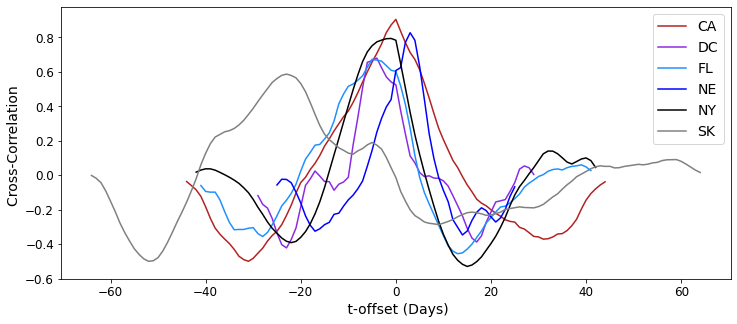

In [0]:
fig, ax1 = plt.subplots(figsize=(12,5))  
ax1.plot(np.arange(-(corr_pos_dead_CA_new.size -1)/2, (corr_pos_dead_CA_new.size -1)/2 + 1 ), corr_pos_dead_CA_new, c='firebrick', label='CA')
ax1.plot(np.arange(-(corr_pos_dead_DC_new.size -1)/2, (corr_pos_dead_DC_new.size -1)/2 + 1 ), corr_pos_dead_DC_new, c='blueviolet',   label='DC')
ax1.plot(np.arange(-(corr_pos_dead_FL_new.size -1)/2, (corr_pos_dead_FL_new.size -1)/2 + 1 ), corr_pos_dead_FL_new, c='dodgerblue', label='FL') 
ax1.plot(np.arange(-(corr_pos_dead_NE_new.size -1)/2, (corr_pos_dead_NE_new.size -1)/2 + 1 ), corr_pos_dead_NE_new, c='blue',  label='NE')
ax1.plot(np.arange(-(corr_pos_dead_NY_new.size -1)/2, (corr_pos_dead_NY_new.size -1)/2 + 1 ), corr_pos_dead_NY_new, c='k',  label='NY')
ax1.plot(np.arange(-(corr_pos_dead_SK_new.size -1)/2, (corr_pos_dead_SK_new.size -1)/2 + 1 ), corr_pos_dead_SK_new, c='grey',  label='SK')
#ax1.set_title('Cross-Correlation of Deaths to S.K.: t= 0 at ' + str(d_con) + ' Deaths', fontsize=14)

ax1.set_xlabel(' t-offset (Days)', fontsize=14 )
ax1.legend(fontsize=14) 
ax1.set_ylabel('Cross-Correlation ', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
#pl.savefig('death_corr_t0_at_' + str(d_con) +'.png')


In [0]:
print('CA')
print(np.max(corr_pos_dead_CA_new), np.arange(-(corr_pos_dead_CA_new.size -1)/2,\
                (corr_pos_dead_CA_new.size -1)/2 + 1 )[np.where(corr_pos_dead_CA_new\
                                          == np.max(corr_pos_dead_CA_new) )[0][0]])
print('FL')
print(np.max(corr_pos_dead_FL_new), np.arange(-(corr_pos_dead_FL_new.size -1)/2,\
                (corr_pos_dead_FL_new.size -1)/2 + 1 )[np.where(corr_pos_dead_FL_new\
                                          == np.max(corr_pos_dead_FL_new) )[0][0]])
print('DC')
print(np.max(corr_pos_dead_DC_new), np.arange(-(corr_pos_dead_DC_new.size -1)/2,\
                (corr_pos_dead_DC_new.size -1)/2 + 1 )[np.where(corr_pos_dead_DC_new\
                                          == np.max(corr_pos_dead_DC_new) )[0][0]])

print('NY')
print(np.max(corr_pos_dead_NY_new), np.arange(-(corr_pos_dead_NY_new.size -1)/2,\
                (corr_pos_dead_NY_new.size -1)/2 + 1 )[np.where(corr_pos_dead_NY_new\
                                          == np.max(corr_pos_dead_NY_new) )[0][0]])

print('NE')
print(np.max(corr_pos_dead_NE_new), np.arange(-(corr_pos_dead_NE_new.size -1)/2,\
                (corr_pos_dead_NE_new.size -1)/2 + 1 )[np.where(corr_pos_dead_NE_new\
                                          == np.max(corr_pos_dead_NE_new) )[0][0]])

print('SK')
print(np.max(corr_pos_dead_SK_new), np.arange(-(corr_pos_dead_SK_new.size -1)/2,\
                (corr_pos_dead_SK_new.size -1)/2 + 1 )[np.where(corr_pos_dead_SK_new\
                                          == np.max(corr_pos_dead_SK_new) )[0][0]])

"print('CA')\nprint(np.max(corr_pos_dead_CA_new), np.arange(-(corr_pos_dead_CA_new.size -1)/2,                (corr_pos_dead_CA_new.size -1)/2 + 1 )[np.where(corr_pos_dead_CA_new                                          == np.max(corr_pos_dead_CA_new) )[0][0]])\nprint('FL')\nprint(np.max(corr_pos_dead_FL_new), np.arange(-(corr_pos_dead_FL_new.size -1)/2,                (corr_pos_dead_FL_new.size -1)/2 + 1 )[np.where(corr_pos_dead_FL_new                                          == np.max(corr_pos_dead_FL_new) )[0][0]])\nprint('DC')\nprint(np.max(corr_pos_dead_DC_new), np.arange(-(corr_pos_dead_DC_new.size -1)/2,                (corr_pos_dead_DC_new.size -1)/2 + 1 )[np.where(corr_pos_dead_DC_new                                          == np.max(corr_pos_dead_DC_new) )[0][0]])\n\nprint('NY')\nprint(np.max(corr_pos_dead_NY_new), np.arange(-(corr_pos_dead_NY_new.size -1)/2,                (corr_pos_dead_NY_new.size -1)/2 + 1 )[np.where(corr_pos_dead_NY_new                                  